<a href="https://colab.research.google.com/github/dukenel/Data_Analytics/blob/master/COVID_19_test_Project_Duke_Nelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Question**

The dataset will help us to the make a prediction on COVID 19 testing. Our goal is to **determine if testing for COVID depends on certain attributes from the dataset.** A Linear Regression Model will thus be developed to  answer this Business Question. 

Dataset is from: https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/COVID-19_Daily_Testing.csv

**We will seek to establish our model using the following structure**


    Environment set up
    Data Acquisition
    EDA
    Can you make a ML model? Don't worry about the approach, just give it a shot. Try Linear regression model and explain your findings.
    Conclusion




**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Acquisition**

In [ ]:
cvd = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/COVID-19_Daily_Testing.csv')

# **Data Wrangling**

In [ ]:
cvd.shape

(89, 59)

In [ ]:
cvd.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [ ]:
cvd.isnull().sum()

Date                                            1
Day                                             1
Tests                                           0
Cases                                           0
People Not-Positive - Total                     0
People Tested - Age 0-17                        0
People Tested - Age 18-29                       0
People Tested - Age 30-39                       0
People Tested - Age 40-49                       0
People Tested - Age 50-59                       0
People Tested - Age 60-69                       0
People Tested - Age 70-79                       0
People Tested - Age 80+                         0
People Tested - Age Unknown                     0
People Tested - Female                          0
People Tested - Male                            0
People Tested - Gender Unknown                  0
People Tested - Latinx                          0
People Tested - Asian Non-Latinx                0
People Tested - Black Non-Latinx                0


In [ ]:
cvd.isna().any()

Date                                             True
Day                                              True
Tests                                           False
Cases                                           False
People Not-Positive - Total                     False
People Tested - Age 0-17                        False
People Tested - Age 18-29                       False
People Tested - Age 30-39                       False
People Tested - Age 40-49                       False
People Tested - Age 50-59                       False
People Tested - Age 60-69                       False
People Tested - Age 70-79                       False
People Tested - Age 80+                         False
People Tested - Age Unknown                     False
People Tested - Female                          False
People Tested - Male                            False
People Tested - Gender Unknown                  False
People Tested - Latinx                          False
People Tested - Asian Non-La

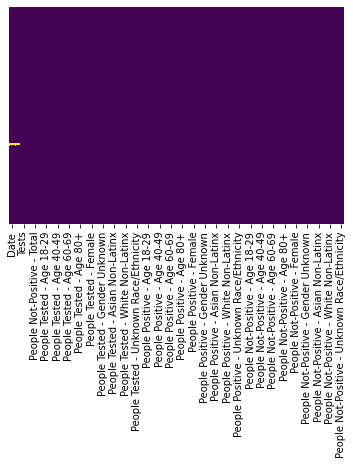

In [ ]:
#Confirm data integrity on null values using heatmap
sns.heatmap(cvd.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Heatmap above indicates that our dataset a null entry on "Date" and "Tests"  attributes.



In [ ]:
#Let's check for any duplicates and drop them if exist.
cvd.drop_duplicates(subset=None, keep=False, inplace=True)

In [ ]:
#Fixing column names
cvd.columns = cvd.columns.str.replace('People Positive - Age 30-30', 'People Positive - Age 30-39')

In [ ]:
#Fixing numerical errors in dataset
cvd["Tests"]=cvd["Tests"].str.replace(',','')
cvd['Tests'] = pd.to_numeric(cvd['Tests'],errors = 'coerce')
cvd["Cases"]=cvd["Cases"].str.replace(',','')
cvd['Cases'] = pd.to_numeric(cvd['Cases'],errors = 'coerce')
cvd["People Not-Positive - Total"]=cvd["People Not-Positive - Total"].str.replace(',','')
cvd['People Not-Positive - Total'] = pd.to_numeric(cvd['People Not-Positive - Total'],errors = 'coerce')
cvd["People Tested - Age 18-29"]=cvd["People Tested - Age 18-29"].str.replace(',','')
cvd['People Tested - Age 18-29'] = pd.to_numeric(cvd['People Tested - Age 18-29'],errors = 'coerce')
cvd["People Tested - Age 30-39"]=cvd["People Tested - Age 30-39"].str.replace(',','')
cvd['People Tested - Age 30-39'] = pd.to_numeric(cvd['People Tested - Age 30-39'],errors = 'coerce')
cvd["People Tested - Female"]=cvd["People Tested - Female"].str.replace(',','')
cvd['People Tested - Female'] = pd.to_numeric(cvd['People Tested - Female'],errors = 'coerce')
cvd["People Tested - Male"]=cvd["People Tested - Male"].str.replace(',','')
cvd['People Tested - Male'] = pd.to_numeric(cvd['People Tested - Male'],errors = 'coerce')
cvd["People Tested - Latinx"]=cvd["People Tested - Latinx"].str.replace(',','')
cvd['People Tested - Latinx'] = pd.to_numeric(cvd['People Tested - Latinx'],errors = 'coerce')
cvd["People Tested - Unknown Race/Ethnicity"]=cvd["People Tested - Unknown Race/Ethnicity"].str.replace(',','')
cvd['People Tested - Unknown Race/Ethnicity'] = pd.to_numeric(cvd['People Tested - Unknown Race/Ethnicity'],errors = 'coerce')
cvd["People Not-Positive - Age 18-29"]=cvd["People Not-Positive - Age 18-29"].str.replace(',','')
cvd['People Not-Positive - Age 18-29'] = pd.to_numeric(cvd['People Not-Positive - Age 18-29'],errors = 'coerce')
cvd["People Not-Positive - Female"]=cvd["People Not-Positive - Female"].str.replace(',','')
cvd['People Not-Positive - Female'] = pd.to_numeric(cvd['People Not-Positive - Female'],errors = 'coerce')
cvd["People Not-Positive - Male"]=cvd["People Not-Positive - Male"].str.replace(',','')
cvd['People Not-Positive - Male'] = pd.to_numeric(cvd['People Not-Positive - Male'],errors = 'coerce')
cvd["People Not-Positive - Unknown Race/Ethnicity"]=cvd["People Not-Positive - Unknown Race/Ethnicity"].str.replace(',','')
cvd['People Not-Positive - Unknown Race/Ethnicity'] = pd.to_numeric(cvd['People Not-Positive - Unknown Race/Ethnicity'],errors = 'coerce')

In [ ]:
#Fix Dates with "/" separators
cvd["Date"]=cvd["Date"].str.replace('/','-')

In [ ]:
#Dropping all rows with empty values
nan_value = float("NaN") #Convert NaN values to empty string
cvd.replace("", nan_value, inplace=True)
cvd.dropna(subset = ["Date"], inplace=True)

In [ ]:
cvd.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-39,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,2431,705,1726,129,470,458,458,412,281,128,94,1,1238,1158,35,569,39,376,276,73,1098,24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05-14-2020,Thursday,4098,772,3326,260,805,833,685,604,471,253,171,16,2049,1786,263,848,55,581,510,144,1960,48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,1654,1424,248,529,43,430,442,109,1773
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


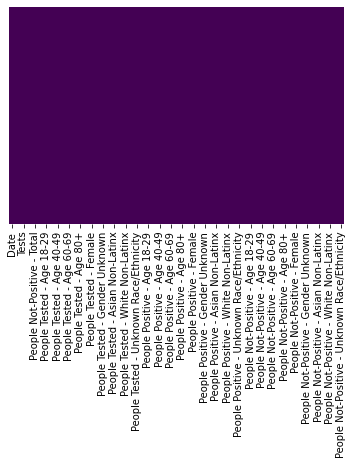

In [ ]:
#Confirm data integrity on null values using heatmap
sns.heatmap(cvd.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         88 non-null     int64 
 3   Cases                                         88 non-null     int64 
 4   People Not-Positive - Total                   88 non-null     int64 
 5   People Tested - Age 0-17                      88 non-null     int64 
 6   People Tested - Age 18-29                     88 non-null     int64 
 7   People Tested - Age 30-39                     88 non-null     int64 
 8   People Tested - Age 40-49                     88 non-null     int64 
 9   People Tested - Age 50-59                     88 non-null     int64 
 10  Peop

In [ ]:
cvd.describe()

,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-39,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2182.727273,504.125000,1678.602273,112.125000,385.568182,418.386364,364.943182,358.443182,283.204545,152.215909,103.863636,3.977273,1131.409091,985.238636,66.079545,390.965909,39.965909,377.125000,286.681818,81.681818,1006.306818,21.750000,90.261364,89.977273,93.068182,87.659091,62.011364,33.352273,25.943182,0.102273,248.159091,247.011364,8.954545,190.397727,11.375000,120.625000,58.215909,21.159091,102.352273,90.375000,295.306818,328.409091,271.875000,270.784091,221.193182,118.863636,77.920455,3.875000,883.25000,738.227273,57.125000,200.568182,28.590909,256.500000,228.465909,60.522727,903.954545
std,1738.103886,365.726511,1426.751141,109.201681,328.404250,316.556887,281.000894,275.616127,229.537724,125.984988,91.753440,5.306637,895.496916,771.117967,84.164757,386.294136,26.306089,234.798462,196.286534,60.471813,872.992572,24.349113,73.984387,68.014700,69.803138,62.940016,42.527204,21.488323,21.497585,0.372620,182.999145,174.650883,13.148060,174.418939,7.640353,74.416244,34.355962,17.732940,98.303195,86.040396,261.140221,257.311951,219.908017,225.897670,199.355044,112.571018,79.387631,5.165786,735.59361,626.169485,75.420021,230.175135,21.381933,192.353422,175.937355,44.842759,786.252525
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.

#**Data Visualization (EDA)**

In [ ]:
#Create a copy of the dataframe
cvd2 = cvd.copy()

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 5.3 MB/s 
     |████████████████████████████████| 4.7 MB 33.0 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
     |████████████████████████████████| 675 kB 71.5 MB/s 
     |████████████████████████████████| 812 kB 72.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9de823525d16c46ee89e3bdf19aacf4fffe54e14c93de9aca67575b8366625d7
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=3bf892d021b4bebb03a61b8239f53b911a2eebd0a47ca58bd0ec4a9daaa499ff
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
import pandas_profiling as pp

In [ ]:
pp.ProfileReport(cvd2)

Summarize dataset:   0%|          | 0/72 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
cvd2.groupby(['Day'])['Tests'].count()

Day
Friday       12
Monday       13
Saturday     11
Sunday       14
Thursday     12
Tuesday      13
Wednesday    13
Name: Tests, dtype: int64

##For both genders, we observe that most patients with heart disease do not have a high resting ecg as the cause

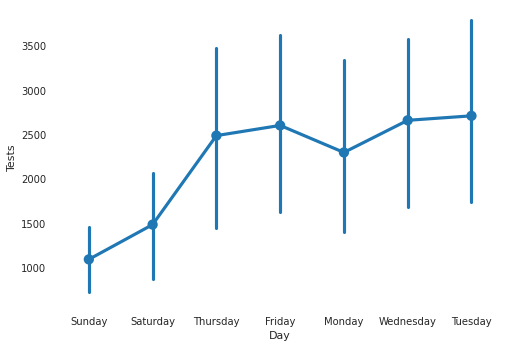

In [ ]:
sns.pointplot(x="Day", y="Tests", data = cvd2)

##We observe from the above plot that tests done are higher on weekdays compared to weekends.

Text(0.5, 1.0, 'Total Tests per Weekday')

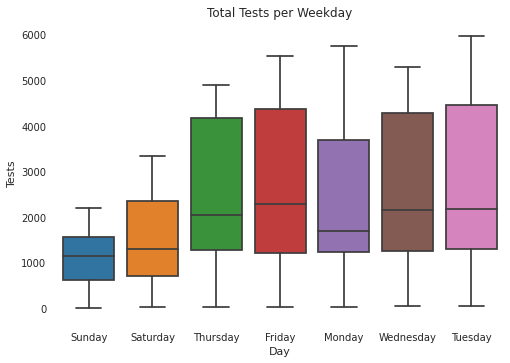

In [ ]:
sns.boxplot(x="Day", y="Tests",data=cvd2)
plt.title("Total Tests per Weekday")

##We observe that women have a higher cholesterol level as a cause of their heart disease


Text(0.5, 1.0, 'Heart Disease and Blood Sugar Level by Gender')

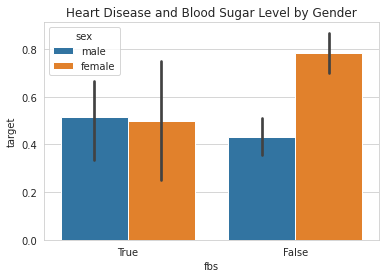

In [ ]:
#Scatterplot with one categorical variable
sns.barplot(x="fbs", y="target", hue="sex", data=data2)
plt.title("Heart Disease and Blood Sugar Level by Gender")

##For a low fasting blood sugar, women are highly at risk of getting heart disease than men.
##For a high fasting blood sugar (>120mg/dl), both genders are fairly at risk of a heart disease.

In [ ]:
data2.groupby(['target', 'sex'])['age'].mean()

target  sex   
0       female    59.041667
        male      56.087719
1       female    54.555556
        male      51.186813
Name: age, dtype: float64

##Average age for a woman to get a heart disease is 54.
##For the Men, the high risk age is averagely 51.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Heart Disease vs. Age')

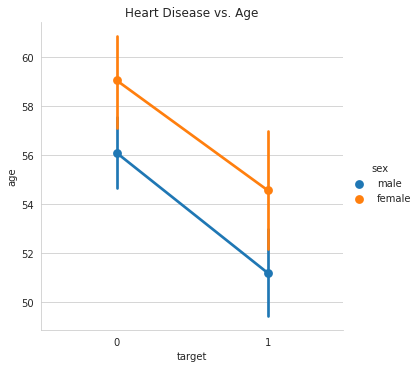

In [ ]:
sns.factorplot(x="target", y="age", hue="sex", data=data2)
plt.title("Heart Disease vs. Age")

# **EDA**
Our data contains *301 observation(rows)*  and *14 variables (columns)* and has *no null values and no Duplicates*.

The average age for participants is 54.5 years with the lowest age as 29 and the highest as 77.
We also observe that there are more males than females in the dataset.

Most participants have a cholesterol value between 200 and 300 mg/dl with the higher values occuring in patients between 55 and 70yrs.

We also observe that as one ages, the maximum heart rate (thalac) decreases

Our **Target Variable** (y) will be "*Target*", and it is of type boolean.

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    object 
 2   cp        301 non-null    object 
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    object 
 6   restecg   301 non-null    object 
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    object 
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    object 
 11  ca        301 non-null    int64  
 12  thal      301 non-null    object 
 13  target    301 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 45.3+ KB


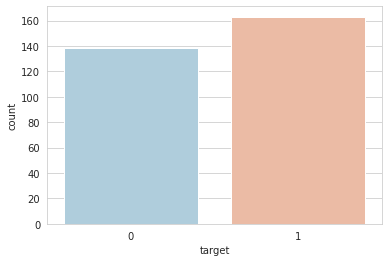

In [ ]:
#Checking for Balance Data on the Target Variable
sns.set_style('whitegrid')
sns.countplot(x='target', data=data_df, palette = 'RdBu_r')

Our Target variable is fairly balanced. We will however proceed with it for the Machine Learning

#**ML - Linear Regression**

***We will:***

**1.Train the dataset**

**2.Fit our Model**

**3.Predict and**

**4.Finally Evaluate**


In [ ]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.3 KB


In [ ]:
#Let's define our input features
X = cvd[['age', 'cp', 'trestbps','chol','fbs', 'restecg', 'thalach','exang','oldpeak', 'slope', 'ca','thal']]

In [ ]:
X.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,3,145,233,1,0,150,0,2.3,0,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2
2,41,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
#Let's define our target variable ("target")
y=cvd[['Tests']]

In [ ]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


# **Builidng the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logReg = LogisticRegression()

In [ ]:
#CALL THE SKLEARN PACKAGE TO BE USED FOR ANALYSIS
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 101)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 12)
(91, 12)
(210, 1)
(91, 1)


In [ ]:
logReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logReg.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1])

In [ ]:
logReg.score(x_test,y_test)

0.8791208791208791

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[38,  8],
       [ 3, 42]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87        46
           1       0.84      0.93      0.88        45

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [ ]:
cm = confusion_matrix(y_test,y_pred)

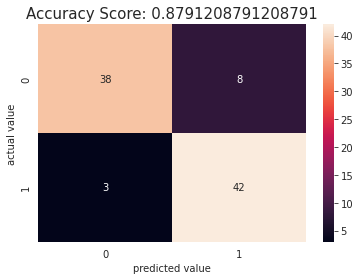

In [ ]:
sns.heatmap(cm,annot=True,fmt='0.0f');
plt.ylabel('actual value');
plt.xlabel('predicted value');
plt.title('Accuracy Score: {0}'.format(logReg.score(x_test,y_test)) , size = 15);

In [ ]:
import matplotlib.pyplot as plt

#Feature Importance

In [ ]:
from matplotlib import pyplot
# get importance
importance = logReg.coef_[0]
print(importance)

[ 0.00446705  0.6589651  -0.01117284  0.00282204  0.05634723  0.48136273
  0.0159258  -0.91424894 -0.495803    0.44436782 -0.87117421 -0.84126211]


Feature: 0, Score: 0.00447
Feature: 1, Score: 0.65897
Feature: 2, Score: -0.01117
Feature: 3, Score: 0.00282
Feature: 4, Score: 0.05635
Feature: 5, Score: 0.48136
Feature: 6, Score: 0.01593
Feature: 7, Score: -0.91425
Feature: 8, Score: -0.49580
Feature: 9, Score: 0.44437
Feature: 10, Score: -0.87117
Feature: 11, Score: -0.84126


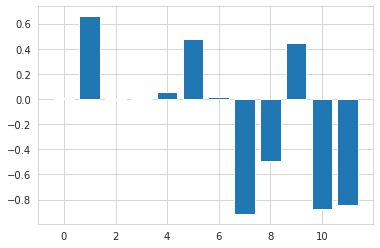

In [ ]:
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Evaluation - Using the F1 Score, we observe that our Logistic Regression Model is 88% accurate for predictions.

# **Conclusion**

For all Three models, we chose a train and test data split as 70% and 30% respectively. In all cases, the target variable "target" was used for the classification.

From the **Logistic Regression** model, our Accuracy Score is 88%

From the **KNN** Model, our Accuracy Score is 82%

From the **Decision Tree** model, our Accuracy Score is 79%

In all cases, the F1 score was used to compute the accuracy, since we have an imbalaced data and we seek to get a balance between Precision and Recall.



# **Next Steps**

Acquiring more data to strengthen the Accuracy and Robustness of the Model.

Balancing the Dataset and then remodeling to verify the performance of each model.